# Data Visualization using R 

## Project in R – Uber Data Analysis Project

### Importing the Essential Packages

In [1]:
library(ggplot2) 
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Creating vector of colors to be implemented in our plots


In [2]:
colors = c(" '#CC1011', '#665555', '#05a399', '#cfcaca', '#f5e840', '#0683c9', '#e075b0' ")

### Reading the Data into their designated variables

In [3]:
apr_data <- read.csv("uber-dataset/uber-raw-data-apr14.csv")
may_data <- read.csv("uber-dataset/uber-raw-data-may14.csv")
jun_data <- read.csv("uber-dataset/uber-raw-data-jun14.csv")
jul_data <- read.csv("uber-dataset/uber-raw-data-jul14.csv")
aug_data <- read.csv("uber-dataset/uber-raw-data-aug14.csv")
sep_data <- read.csv("uber-dataset/uber-raw-data-sep14.csv")

In [4]:
data_2014 <- rbind(apr_data,may_data, jun_data, jul_data, aug_data, sep_data)
data_2014$Date.Time <- as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S")
data_2014$Time <- format(as.POSIXct(data_2014$Date.Time, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")
data_2014$Date.Time <- ymd_hms(data_2014$Date.Time)

In [5]:
data_2014$day <- factor(day(data_2014$Date.Time))
data_2014$month <- factor(month(data_2014$Date.Time, label = TRUE))
data_2014$year <- factor(year(data_2014$Date.Time))
data_2014$dayofweek <- factor(wday(data_2014$Date.Time, label = TRUE))

In [6]:
data_2014$hour <- factor(hour(hms(data_2014$Time)))
data_2014$minute <- factor(minute(hms(data_2014$Time)))
data_2014$second <- factor(second(hms(data_2014$Time)))

#### Plotting the trips by the hours in a day

In [7]:
hour_data <- data_2014 %>%
           group_by(hour) %>%
               dplyr::summarize(Total = n()) 
datatable(hour_data)

HTML widgets cannot be represented in plain text (need html)

#### Trips every Hour

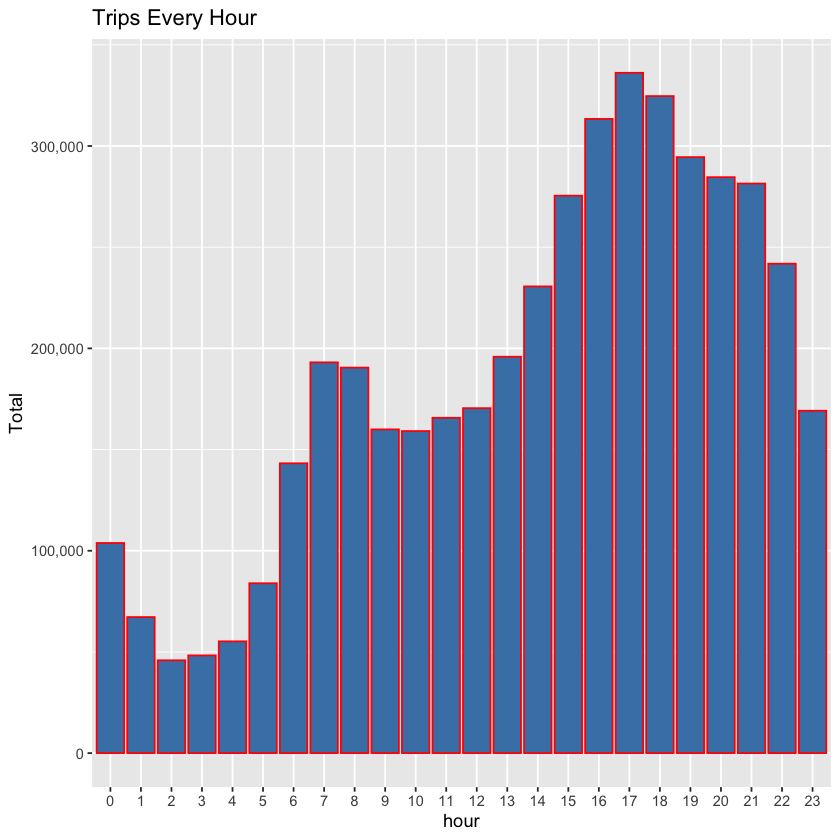

In [8]:
ggplot(hour_data, aes(hour, Total)) + 
        geom_bar( stat = "identity", fill = "steelblue", color = "red") +
           ggtitle("Trips Every Hour") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)


#### Trips by Hour and Month

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


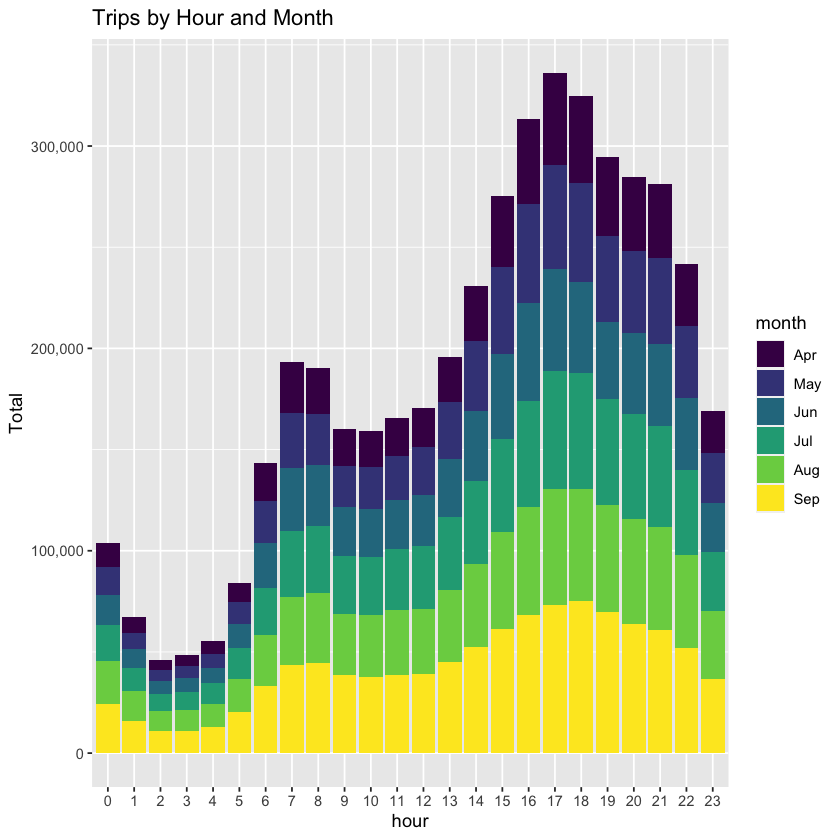

In [9]:
month_hour <- data_2014 %>%
          group_by(month, hour) %>%
             dplyr::summarize(Total = n())
ggplot(month_hour, aes(hour, Total, fill = month)) + 
       geom_bar( stat = "identity") +
          ggtitle("Trips by Hour and Month") +
           scale_y_continuous(labels = comma)

### Plotting data by trips during every day of the month

In [10]:
day_group <- data_2014 %>%
          group_by(day) %>%
             dplyr::summarize(Total = n()) 
datatable(day_group)

HTML widgets cannot be represented in plain text (need html)

#### Trips every day

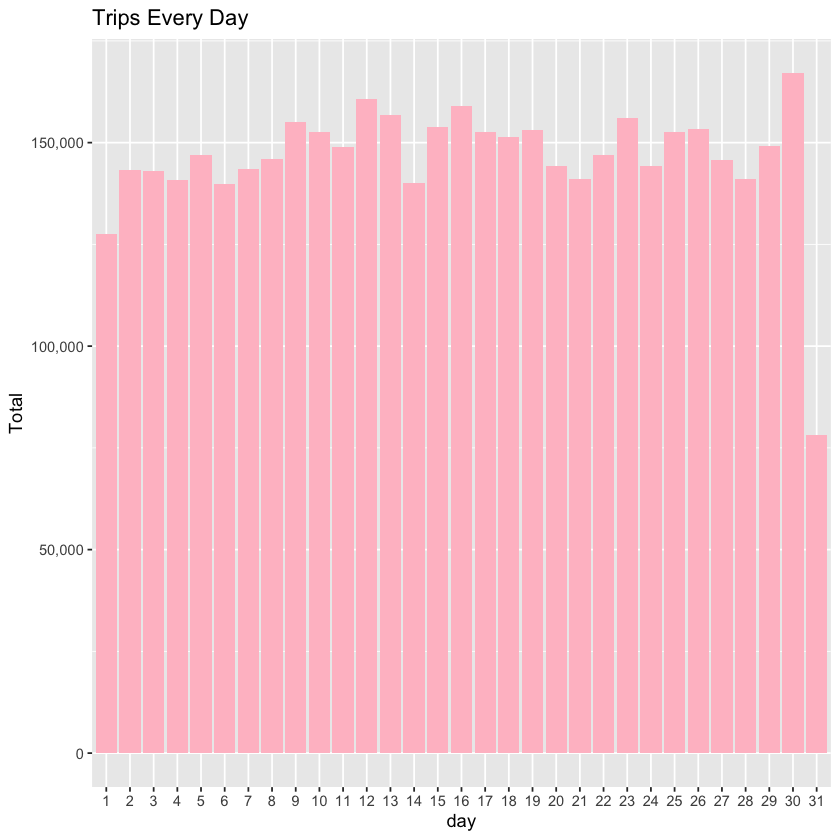

In [11]:
ggplot(day_group, aes(day, Total)) + 
        geom_bar( stat = "identity", fill = "pink") +
           ggtitle("Trips Every Day") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma)

#### Trips by day and month

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


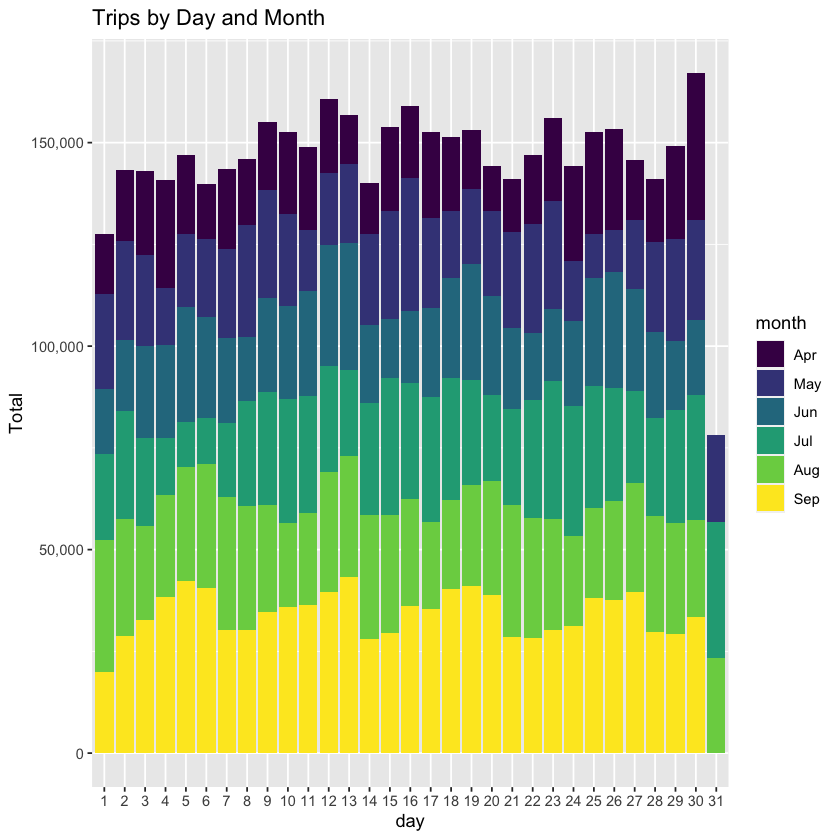

In [12]:
day_month_group <- data_2014 %>%
         group_by(month, day) %>%
             dplyr::summarize(Total = n())
ggplot(day_month_group, aes(day, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Day and Month") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors,aesthetics = "colour")

### Number of Trips taking place during months in a year

In [13]:
month_group <- data_2014 %>%
          group_by(month) %>%
             dplyr::summarize(Total = n()) 
datatable(month_group)

HTML widgets cannot be represented in plain text (need html)

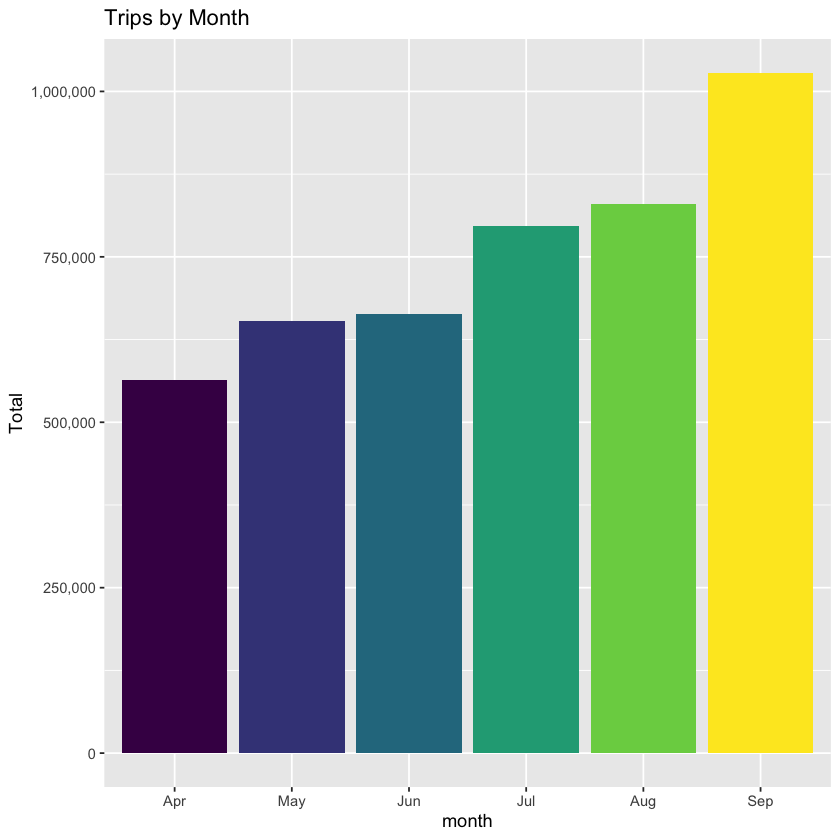

In [14]:
ggplot( month_group, aes(month, Total, fill = month)) + 
        geom_bar( stat = "identity") +
           ggtitle("Trips by Month") +
            theme(legend.position = "none") +
            scale_y_continuous(labels = comma) +
            scale_fill_manual(values = colors,aesthetics = "colour")

#### Trips by Day and Month

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


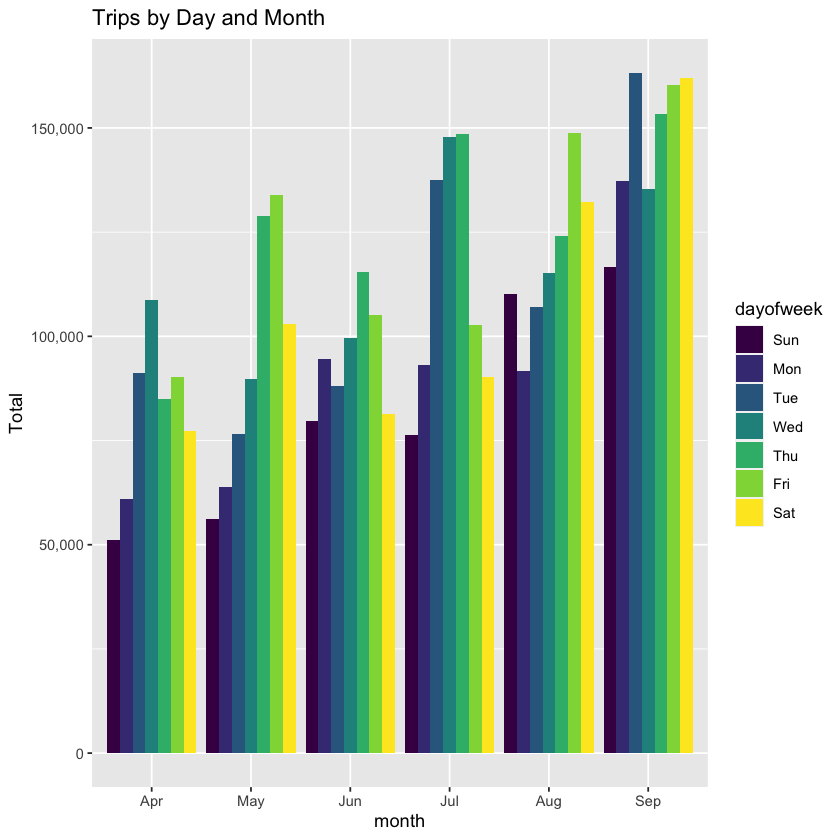

In [15]:
month_weekday <- data_2014 %>%
         group_by(month, dayofweek) %>%
             dplyr::summarize(Total = n())
ggplot(month_weekday, aes(month, Total, fill = dayofweek)) + 
       geom_bar( stat = "identity", position = "dodge") +
          ggtitle("Trips by Day and Month") +
           scale_y_continuous(labels = comma) +
           scale_fill_manual(values = colors, aesthetics = "colour",
  na.value = "grey50")

### Finding out the number of Trips by bases

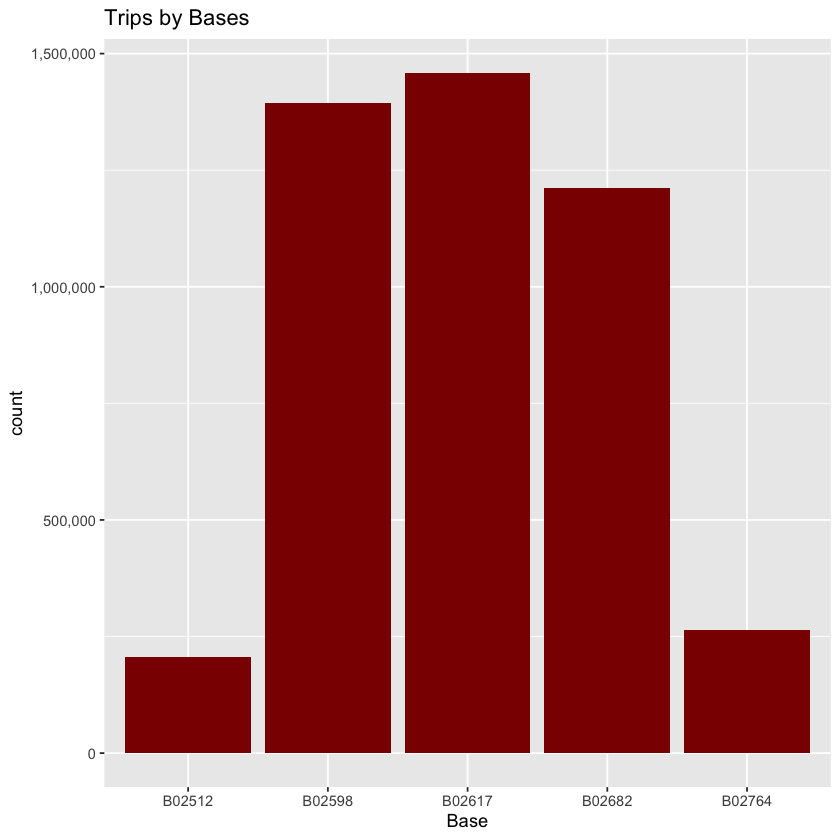

In [16]:
ggplot(data_2014, aes(Base)) + 
 geom_bar(fill = "darkred") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases")


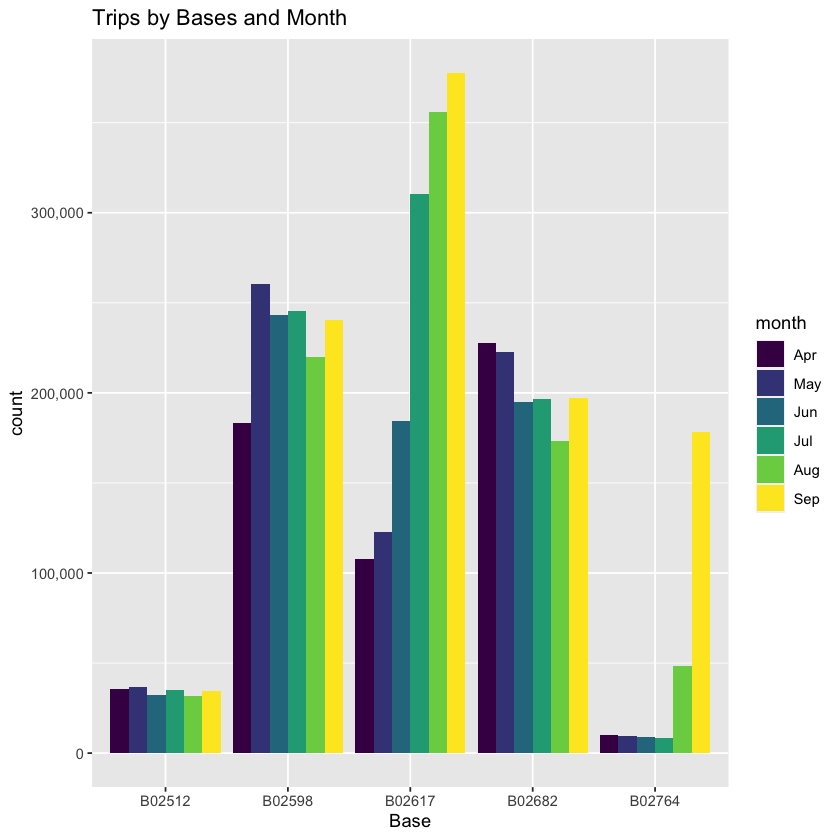

In [17]:
ggplot(data_2014, aes(Base, fill = month)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and Month") +
 scale_fill_manual(values = colors, aesthetics = "colour",
  na.value = "grey50")

#### Trips by Bases and DayofWeek

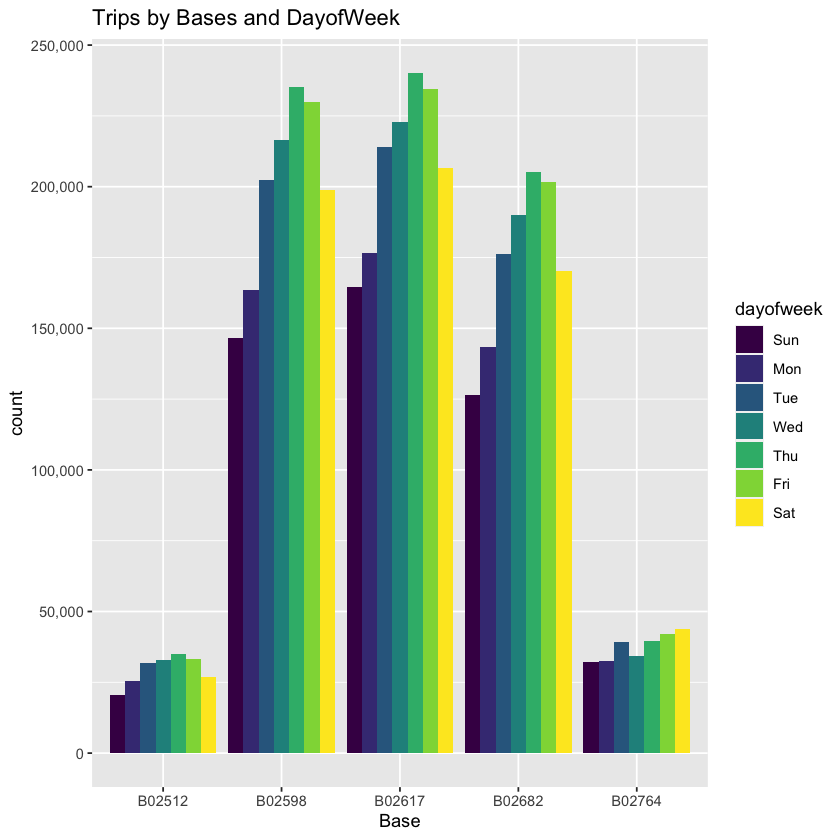

In [18]:
ggplot(data_2014, aes(Base, fill = dayofweek)) + 
 geom_bar(position = "dodge") +
 scale_y_continuous(labels = comma) +
 ggtitle("Trips by Bases and DayofWeek") +
 scale_fill_manual(values = colors,aesthetics = "colour",
  na.value = "grey50")

### Creating a Heatmap visualization of day, hour and month

In [19]:
day_and_hour <- data_2014 %>%
         group_by(day, hour) %>%
            dplyr::summarize(Total = n())
datatable(day_and_hour)

`summarise()` has grouped output by 'day'. You can override using the `.groups` argument.


HTML widgets cannot be represented in plain text (need html)

#### Heatmap by Hour and Day

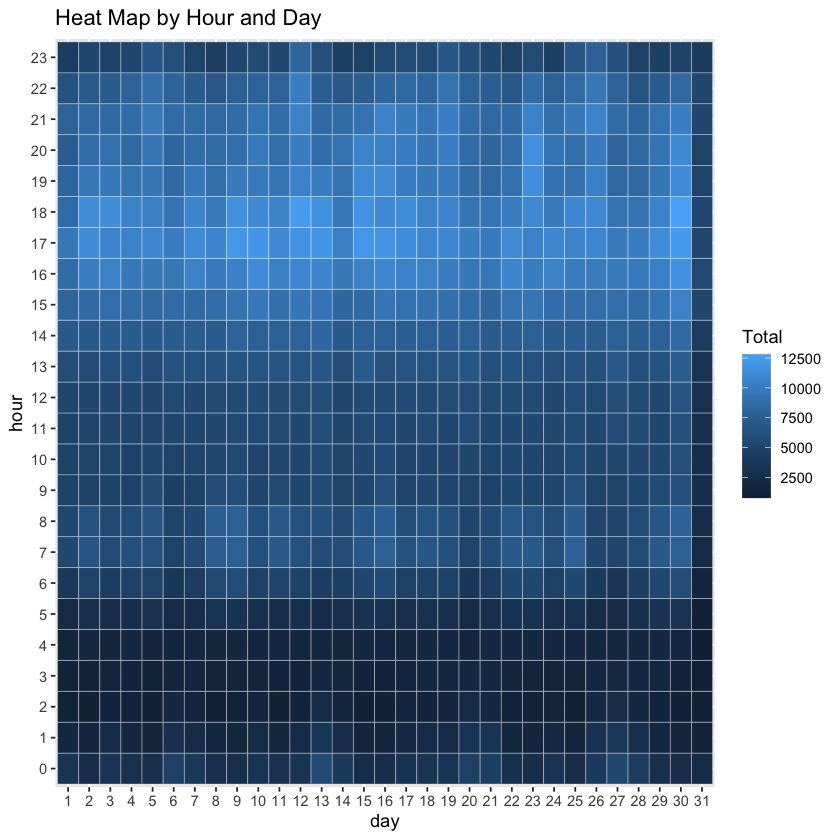

In [20]:
ggplot(day_and_hour, aes(day, hour, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Hour and Day")

#### heatmap by Month and Day

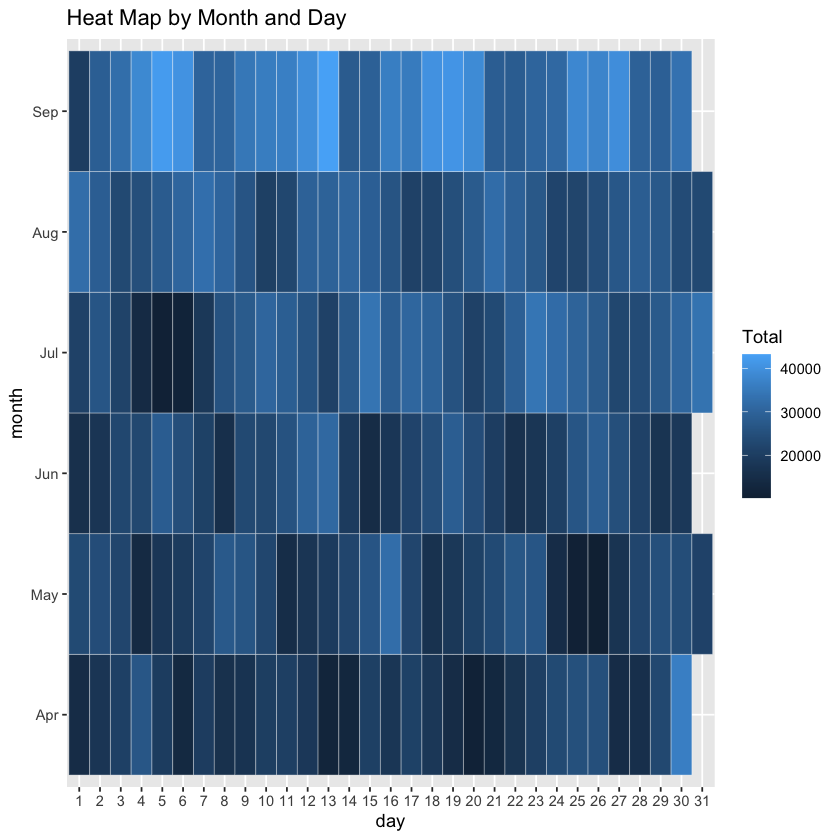

In [21]:
ggplot(day_month_group, aes(day, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day")

#### Heatmap by Month and Day of week

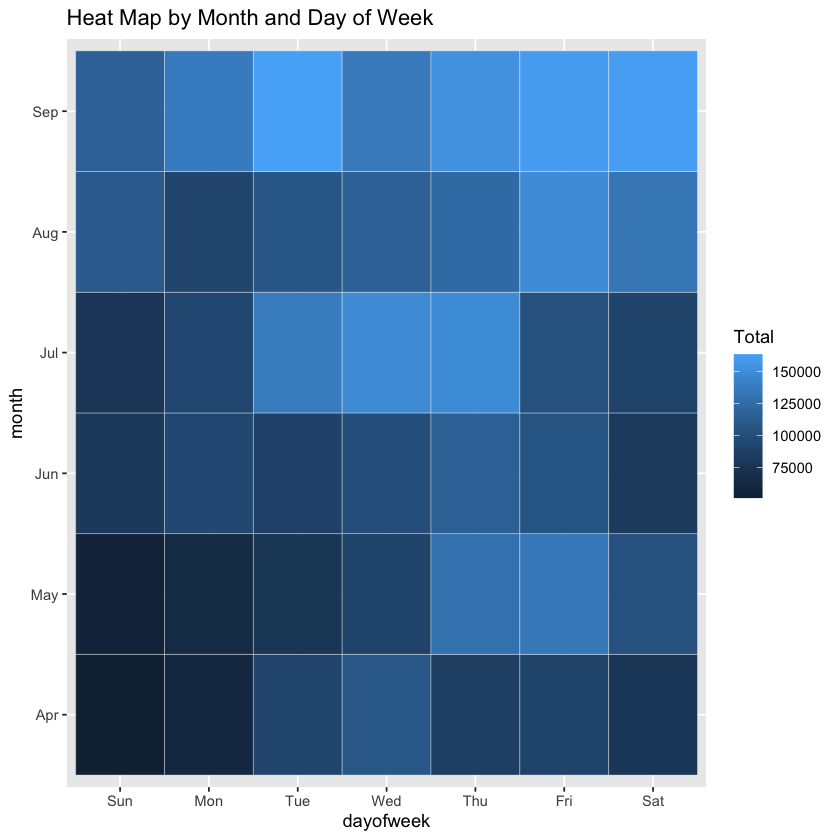

In [22]:
ggplot(month_weekday, aes(dayofweek, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Day of Week")

#### Heatmap by bases and day of week

`summarise()` has grouped output by 'Base'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Base'. You can override using the `.groups` argument.


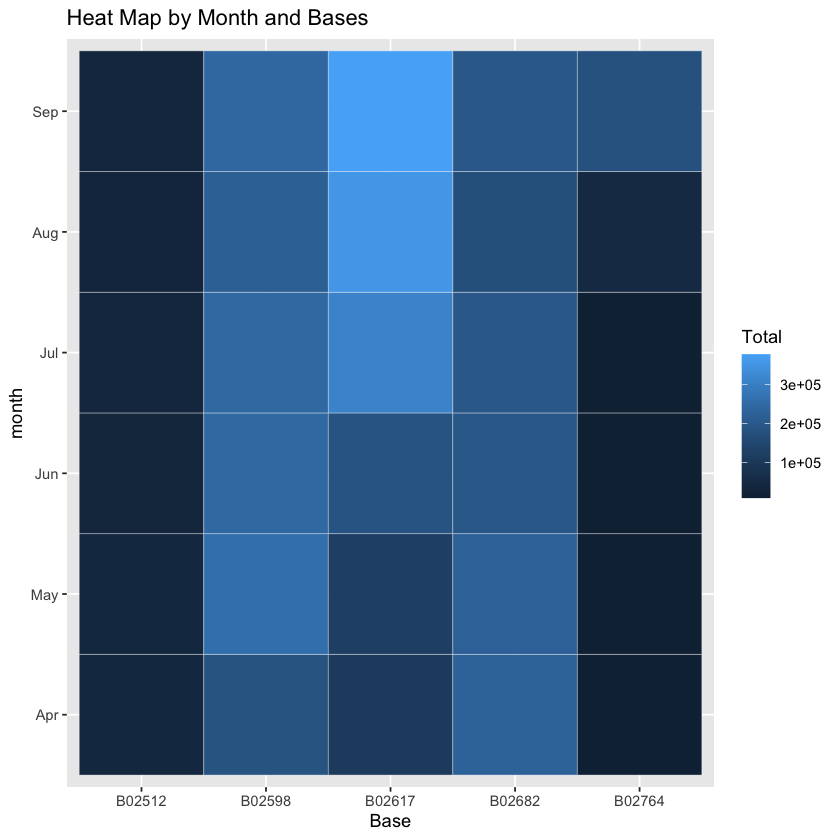

In [23]:
month_base <-  data_2014 %>%
                    group_by(Base, month) %>%
                        dplyr::summarize(Total = n()) 
day0fweek_bases <-  data_2014 %>%
                    group_by(Base, dayofweek) %>%
                        dplyr::summarize(Total = n()) 
ggplot(month_base, aes(Base, month, fill = Total)) +
            geom_tile(color = "white") +
              ggtitle("Heat Map by Month and Bases")

### Creating a map visualization of rides in New York

In [ ]:
min_lat <- 40.5774
max_lat <- 40.9176
min_long <- -74.15
max_long <- -73.7004
ggplot(data_2014, aes(x=Lon, y=Lat)) +
  geom_point(size=1, color = "blue") +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
        theme_map() +
           ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")



Warning message:
“Removed 71701 rows containing missing values (geom_point).”


In [ ]:
ggplot(data_2014, aes(x=Lon, y=Lat, color = Base)) +
  geom_point(size=1) +
     scale_x_continuous(limits=c(min_long, max_long)) +
      scale_y_continuous(limits=c(min_lat, max_lat)) +
       theme_map() +
          ggtitle("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")

---